# Wine Quality Prediction Model

In [6]:
# importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [7]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/Users/sam/wine_dataset_sheet.csv')

In [8]:
# number of rows & columns in the dataset
wine_dataset.shape

(12996, 13)

In [9]:
# first 5 rows of the dataset
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [10]:
# checking for missing values in the dataset 
wine_dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity        10
citric acid              4
residual sugar           4
chlorides                4
free sulfur dioxide      2
total sulfur dioxide     2
density                  2
pH                      11
sulphates                6
alcohol                  2
quality                  2
dtype: int64

In [11]:
#filling the empty values in the dataset by the ffill method 
wine_dataset.fillna(method="ffill", inplace=True)

In [12]:
#checking for the missing values again 
wine_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visulaization

In [13]:
# statistical measures of the dataset using describe()
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000,12996.000000
mean,7.215351,0.339684,0.318704,5.442925,0.056036,30.523392,115.733226,0.994697,3.218514,0.531283,10.491879,5.818406
std,1.296185,0.164612,0.145280,4.757329,0.035029,17.748031,56.522733,0.002998,0.160735,0.148810,1.192591,0.873157
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


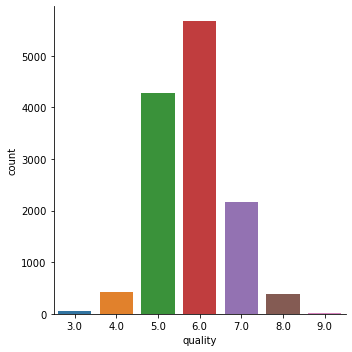

In [14]:
#catplot deals with the frequencies.
#We are using Catplot to find the number of values for each quality value.
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

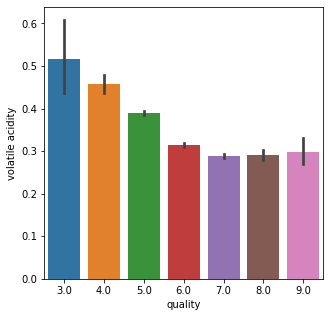

In [15]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

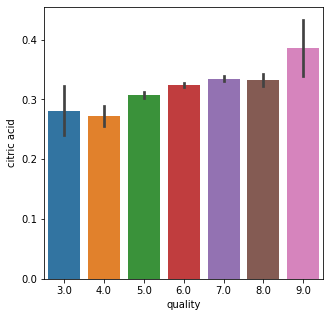

In [16]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

## Correlation
1.Positive Correlation
2.Negative Correlation

In [17]:
#using correlation function to understand the relationships between the parameters
correlation = wine_dataset.corr()

<AxesSubplot:>

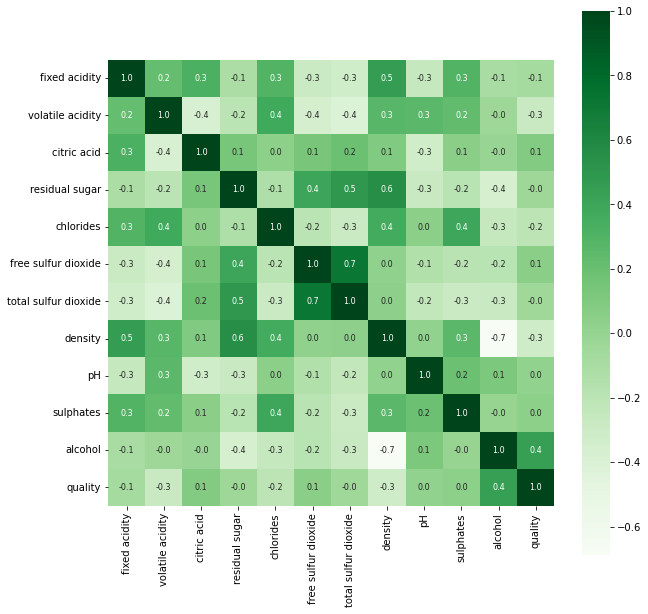

In [18]:
#constructing a heatmap to know about the correlation between the differnt parameters of the dataset 
plot= plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

# data preprocessing

In [19]:
# We will use label encoder to encode 'type' colummn in the dataset 
x2=wine_dataset.iloc[:,0]

In [20]:
# Importing the Label Encoder 
from sklearn import preprocessing 
label_encoder= preprocessing.LabelEncoder()

In [21]:
# Fitting the Label encoder to a variable (x2)
x2=label_encoder.fit_transform(x2)

In [22]:
# Printing x2
print(x2)

[1 1 1 ... 0 0 0]


In [23]:
# now we will start with the data preeprocessing steps 
# we will seperate the data and the Labels 
# here the label is 'quality'
x= wine_dataset.drop('quality', axis=1)

In [24]:
wine_dataset[wine_dataset.columns[0]] = pd.Series(x2)
wine_dataset.head()
x = wine_dataset.iloc[:, 0:12]
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Now we want to convert the six 'quality' variables in two labels i.e either 'good' or 'bad'.
### So the process by which we can convert is known as "Label Binarization".

In [25]:
#Label binarization 
y= wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0) 

In [26]:
#now we have two 'quality' labels i.e 0 or 1 
y

0        0
1        0
2        0
3        0
4        0
        ..
12991    0
12992    0
12993    0
12994    0
12995    0
Name: quality, Length: 12996, dtype: int64

In [27]:
#let's call the required dependencies which will be required for training our model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [28]:
#spliting the data in train and test splits in order to create the model 
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [29]:
#checking the shape of y_train, y_test, x_train, x_test
y_train.shape

(10396,)

In [30]:
y_test.shape

(2600,)

In [31]:
x_train.shape

(10396, 12)

In [32]:
x_test.shape

(2600, 12)

## Model Training 

In [33]:
#we will create our model
model= RandomForestClassifier()

In [34]:
model.fit(x_train, y_train)

RandomForestClassifier()

## Model Accuracy Check

In [35]:
#checking the accuracy of the test data 
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
test_confusion_matrix = confusion_matrix(x_test_prediction,y_test)
test_classification_report = classification_report(x_test_prediction, y_test)

In [36]:
#printing the accuracy
print(test_data_accuracy)

0.9823076923076923


In [37]:
import pickle

In [38]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [39]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [40]:
#printing confusion matriix
print(test_confusion_matrix)

[[2072   44]
 [   2  482]]


In [41]:
#printing the classification report 
print(test_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2116
           1       0.92      1.00      0.95       484

    accuracy                           0.98      2600
   macro avg       0.96      0.99      0.97      2600
weighted avg       0.98      0.98      0.98      2600



In [52]:
## Building the Predictive System to predict the quality of wine 
input_data= (1,6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5)
input_data = (1, 4.8, 0.085, 0.0, 0.6, 0.009, 1.0, 6.0, 0.98711, 2.87, 0.22, 8.0)
#input_data=sys.argv[1]
print ("SCRIPT_NAME=",sys.argv[0])
print ("INPUT_DATA = ", input_data)
#changing the input data to numpy array 
input_data_as_numpy_array=np.asarray(input_data)
print ("input_data_as_numpy_array=", input_data_as_numpy_array)
#reshape the data as we are predicting the label for once one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print ("input_data_reshaped=", input_data_reshaped)

SCRIPT_NAME= /Users/sam/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py
INPUT_DATA =  (1, 4.8, 0.085, 0.0, 0.6, 0.009, 1.0, 6.0, 0.98711, 2.87, 0.22, 8.0)


In [55]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


In [56]:
# Setting up the condition for predicted value 
if prediction[0]==1:
              print('Good Quality Wine')
else:
              print('Bad Quality Wine')

Bad Quality Wine
